In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize as hm
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
%matplotlib inline

Using TensorFlow backend.


In [2]:
gpdframe = pd.read_csv("datasets/gpd.csv")



In [3]:
gpd_years = []
gpd_values = gpdframe.values.astype(float)
gpd_values = np.array(gpd_values[0]/1000000000000)
for i in gpdframe:
    gpd_years.append(i)
gpd_years = np.asarray(gpd_years)

In [4]:
print(gpd_years)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']


In [5]:
print(gpd_values)
print(hm.intword(gpd_values[50]))

[0.01516557 0.01523685 0.01992629 0.02302148 0.02121189 0.02179004
 0.02706272 0.03059183 0.03387588 0.0374589  0.0423276  0.04920446
 0.05853901 0.07927906 0.10513601 0.12370938 0.15267802 0.17617128
 0.20080089 0.22496949 0.2350246  0.26356109 0.2816823  0.20330452
 0.20902391 0.22294279 0.26813722 0.29408411 0.33039738 0.42559531
 0.46195178 0.60286    0.40059925 0.43779858 0.558112   0.78564346
 0.85042583 0.88319944 0.8637234  0.59938888 0.65542115 0.5593725
 0.50796274 0.55832012 0.66931624 0.89162997 1.10764033 1.39708438
 1.69582452 1.66701961 2.20887165 2.61620158 2.46518867 2.47280692
 2.4559932  1.80365265 1.79618659]
2


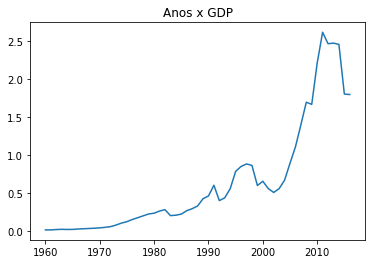

In [6]:
plt.plot(gpd_years,gpd_values)
plt.title('Anos x GDP')
xlegend = np.arange(min(gpd_years.astype(int)),max(gpd_years.astype(int)),10)
plt.xticks(xlegend,(xlegend))
#plt.ylim()
plt.show()

In [7]:
column_names = np.arange(1990,2018,1)
carframe = pd.read_csv("datasets/car.csv",header=None,  names = column_names)
car_amount=carframe.values[0]
print(car_amount)

[ 712708  791508  771477 1166188 1426651 1684846 1728558 1931016 1546618
 1176881 1411752 1586928 1466487 1431381 1578836 1714724 1925898 2462605
 2820963 3141009 3515039 3632974 3801703 3767165 3497818 2568980 2050240
 2239659]


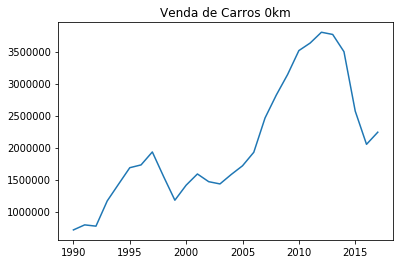

In [8]:
plt.plot(np.arange(1990,2018,1),car_amount)
plt.title('Venda de Carros 0km')
plt.show()

In [9]:
print(max(gpd_years.astype(int))-min(gpd_years.astype(int)))
print(len(car_amount[0:len(car_amount)-1]))
print(len(gpd_values[30:len(gpd_values)]))


56
27
27


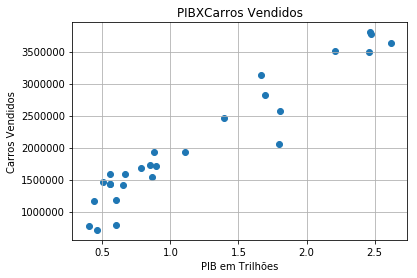

In [10]:
plt.scatter(gpd_values[30:len(gpd_values)],car_amount[0:len(car_amount)-1])
plt.grid(True)
plt.xlabel('PIB em Trilhões')
plt.ylabel('Carros Vendidos')
plt.title('PIBXCarros Vendidos')
plt.show()

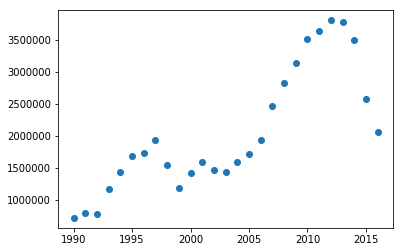

In [11]:
plt.scatter(np.arange(1990,2017,1),car_amount[0:len(car_amount)-1]);
plt.show()

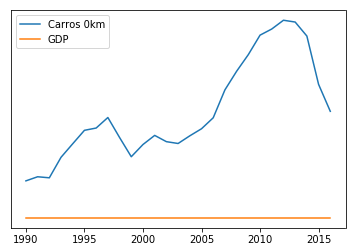

In [12]:
plt.plot(np.arange(1990,2017,1),car_amount[0:len(car_amount)-1], label='Carros 0km')
plt.plot(np.arange(1990,2017,1),gpd_values[30:len(gpd_values)], label='GDP')
plt.yticks([])
plt.legend()
plt.show()

In [13]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))
model.compile(optimizer='sgd',
              loss='mse')

In [14]:
X,Y=gpd_values[30:len(gpd_values)],(car_amount[0:len(car_amount)-1]/1000000)
trX = np.linspace(-1, 1, 27)
trY = (2 * trX) + (np.random.randn(*trX.shape) * 0.33)
print(Y)

#model.fit(trX,trY , epochs=100, verbose=1)
model.fit(Y[0:len(Y)-1],X[0:len(X)-1] , epochs=100, verbose=1)

[0.712708 0.791508 0.771477 1.166188 1.426651 1.684846 1.728558 1.931016
 1.546618 1.176881 1.411752 1.586928 1.466487 1.431381 1.578836 1.714724
 1.925898 2.462605 2.820963 3.141009 3.515039 3.632974 3.801703 3.767165
 3.497818 2.56898  2.05024 ]
Epoch 1/100
26/26 [==============================] - 1s 20ms/step - loss: 3.1426
Epoch 2/100
26/26 [==============================] - 0s 199us/step - loss: 2.4597
Epoch 3/100
26/26 [==============================] - 0s 132us/step - loss: 1.9300
Epoch 4/100
26/26 [==============================] - 0s 94us/step - loss: 1.5191
Epoch 5/100
26/26 [==============================] - 0s 71us/step - loss: 1.2004
Epoch 6/100
26/26 [==============================] - 0s 72us/step - loss: 0.9532
Epoch 7/100
26/26 [==============================] - 0s 213us/step - loss: 0.7613
Epoch 8/100
26/26 [==============================] - 0s 67us/step - loss: 0.6125
Epoch 9/100
26/26 [==============================] - 0s 61us/step - loss: 0.4969
Epoch 10/100
26/26 [

Epoch 98/100
26/26 [==============================] - 0s 108us/step - loss: 0.0702
Epoch 99/100
26/26 [==============================] - 0s 105us/step - loss: 0.0700
Epoch 100/100
26/26 [==============================] - 0s 91us/step - loss: 0.0697


In [15]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]

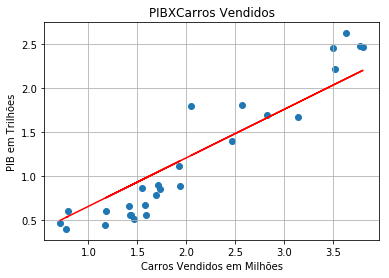

In [16]:
plt.scatter(Y,X)
plt.grid(True)
plt.ylabel('PIB em Trilhões')
plt.xlabel('Carros Vendidos em Milhões')
plt.title('PIBXCarros Vendidos')
plt.plot(Y, w*Y + b, c='red')
plt.show()

In [17]:
#print(X)
out = np.array([2.05024])
print(model.predict(out))
print(X)

[[1.2330966]]
[0.46195178 0.60286    0.40059925 0.43779858 0.558112   0.78564346
 0.85042583 0.88319944 0.8637234  0.59938888 0.65542115 0.5593725
 0.50796274 0.55832012 0.66931624 0.89162997 1.10764033 1.39708438
 1.69582452 1.66701961 2.20887165 2.61620158 2.46518867 2.47280692
 2.4559932  1.80365265 1.79618659]


In [39]:
print(Y.ndim)

1


In [43]:
year_of_study= np.arange(1,20,1)
salary = np.arange(2,40,2)
print(year_of_study)
print(salary.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(19,)


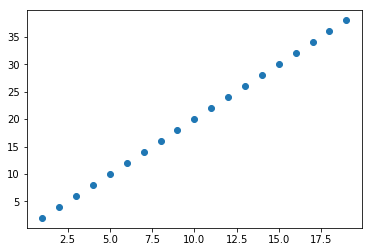

In [44]:
plt.scatter(year_of_study,salary)
plt.show()

In [45]:
r2_score(year_of_study,salary)

-3.333333333333333

In [48]:
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
model2.add(Activation('linear'))
model2.compile(optimizer='sgd',
              loss='mse')
model2.fit(np.arange(1,20,1),np.arange(1,20,1), epochs=10, verbose=1)

Epoch 1/10
19/19 [==============================] - 0s 5ms/step - loss: 50.8591
Epoch 2/10
19/19 [==============================] - 0s 199us/step - loss: 132.7186
Epoch 3/10
19/19 [==============================] - 0s 110us/step - loss: 346.3357
Epoch 4/10
19/19 [==============================] - 0s 145us/step - loss: 903.7808
Epoch 5/10
19/19 [==============================] - 0s 265us/step - loss: 2358.4651
Epoch 6/10
19/19 [==============================] - 0s 153us/step - loss: 6154.5430
Epoch 7/10
19/19 [==============================] - 0s 120us/step - loss: 16060.6221
Epoch 8/10
19/19 [==============================] - 0s 136us/step - loss: 41911.0781
Epoch 9/10
19/19 [==============================] - 0s 236us/step - loss: 109369.2734
Epoch 10/10
19/19 [==============================] - 0s 122us/step - loss: 285405.0625
